# **FizzBuzz Machine Learning Classifier**

This notebook implements several classification models to solve the FizzBuzz problem using automatically generated data. The models used are MLPClassifier, RandomForestClassifier, and SVM. Additionally, cross-validation is used to evaluate the performance of the models.


# **Importing Libraries**

Importing the necessary libraries for the project.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pickle
import os

## **FizzBuzz Function**

This function takes an integer and returns a label based on the FizzBuzz rules:
- "FizzBuzz" if the number is divisible by 15.
- "Fizz" if the number is divisible by 3.
- "Buzz" if the number is divisible by 5.
- "None" if the number is not divisible by any of the above.

In [2]:
def fizzbuzz(n):
    if n % 15 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'None'

## **Function to Create CSV Files**

This function generates a CSV file with input data (numbers) and their corresponding FizzBuzz labels.

In [3]:
def create_input_csv(start, end, filename):
    data = {"input": list(range(start, end)), "label": [fizzbuzz(i) for i in range(start, end)]}
    pd.DataFrame(data).to_csv(filename, index=False)
    print(f"{filename} Created!")

## **Function to Process Data**

This function takes a DataFrame and processes it to convert the numeric inputs into binary representation and the labels into numeric values.

In [4]:
def process_data(dataset):
    data = dataset['input'].values
    labels = dataset['label'].values
    processed_data = np.array([[int(bit) for bit in format(i, '012b')] for i in data])
    label_map = {'None': 0, 'Fizz': 1, 'Buzz': 2, 'FizzBuzz': 3}
    processed_label = [label_map[label] for label in labels]
    return processed_data, processed_label

# **Creating Datasets**

Generate two datasets: one for training and one for testing.

In [5]:
create_input_csv(101, 4001, 'training.csv')
create_input_csv(1, 101, 'testing.csv')

training.csv Created!
testing.csv Created!


# **Reading and Processing Datasets**

Read the created CSV files and process the data to be ready for model training.

In [6]:
train_data = pd.read_csv('training.csv', na_filter=False)
test_data = pd.read_csv('testing.csv', na_filter=False)
X_train, y_train = process_data(train_data)
X_test, y_test = process_data(test_data)

# **Setting Up Cross-Validation**

Define a KFold with 10 splits to perform cross-validation during model training.

In [7]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# **Function to Evaluate Models**

This function takes a model, trains it with the provided data, and evaluates its performance using cross-validation and test data. It prints the accuracy and classification report of the model.

In [8]:
def evaluate_model(model, X, y, model_name):
    cv_scores = cross_val_score(model, X, y, cv=kf)
    model.fit(X, y)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n {classification_report(y_test, predictions, target_names=['None', 'Fizz', 'Buzz', 'FizzBuzz'], zero_division=0)}")
    return accuracy

# **Training and Evaluating Models**

Train and evaluate three different models: MLPClassifier, RandomForestClassifier, and SVM, using the `evaluate_model` function.

In [9]:
# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, activation='relu', solver='adam')
accuracy_mlp = evaluate_model(mlp, X_train, y_train, "MLP")

# Train RandomForest
rf = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=2)
accuracy_rf = evaluate_model(rf, X_train, y_train, "RandomForest")

# Train SVM
svm = SVC()
accuracy_svm = evaluate_model(svm, X_train, y_train, "SVM")

MLP Cross-Validation Accuracy: 0.9767
MLP Test Accuracy: 0.9900
MLP Classification Report:
               precision    recall  f1-score   support

        None       1.00      0.98      0.99        53
        Fizz       1.00      1.00      1.00        27
        Buzz       0.93      1.00      0.97        14
    FizzBuzz       1.00      1.00      1.00         6

    accuracy                           0.99       100
   macro avg       0.98      1.00      0.99       100
weighted avg       0.99      0.99      0.99       100

RandomForest Cross-Validation Accuracy: 0.5195
RandomForest Test Accuracy: 0.5300
RandomForest Classification Report:
               precision    recall  f1-score   support

        None       0.53      1.00      0.69        53
        Fizz       0.00      0.00      0.00        27
        Buzz       0.00      0.00      0.00        14
    FizzBuzz       0.00      0.00      0.00         6

    accuracy                           0.53       100
   macro avg       0.13     






# **Models Comparation**

In this section, we compare the performance of the three machine learning models. The comparison is based on their test accuracy.

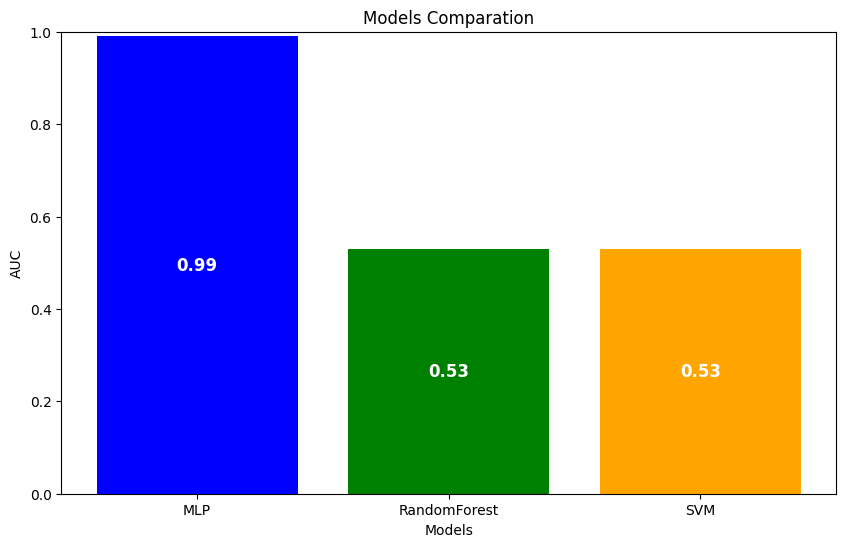

In [10]:
model_names = ['MLP', 'RandomForest', 'SVM']
auc_values = [accuracy_mlp, accuracy_rf, accuracy_svm]


plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, auc_values, color=['blue', 'green', 'orange'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, round(yval, 4), ha='center', va='center', fontsize=12, color='white', fontweight='bold')

plt.xlabel('Models')
plt.ylabel('AUC')
plt.title('Models Comparation')
plt.ylim(0, 1)
plt.show()

# **Save Model**

In [12]:
os.makedirs(os.path.dirname('./model_mlp.pkl'), exist_ok=True)

with open('model_mlp.pkl', 'wb') as file:
    pickle.dump(mlp, file)
print(f"Model saved!")

Model saved!
